<a href="https://colab.research.google.com/github/nyang-cook/Colabatory/blob/main/TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

구글 드라이브에 csv 파일 추가하는 법 https://resultofeffort.tistory.com/59

코랩에 csv파일 넣는 법
https://resultofeffort.tistory.com/60

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_gender_submission = pd.read_csv("/content/drive/MyDrive/타이타닉/gender_submission.csv")
df_test = pd.read_csv("/content/drive/MyDrive/타이타닉/test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/타이타닉/train.csv")
df_train # train 데이터를 보기 위함


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 데이터 전처리 및 시각화

In [4]:
print("칼럼 속성 확인하기")
df_train.info()
# 결측값 과 데이터 타입 확인

칼럼 속성 확인하기
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 결측치 제거
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train['Cabin'].fillna('N', inplace=True)
df_train['Embarked'].fillna('N', inplace=True)
list_col = ['Age', 'Cabin', 'Embarked']
for col in list_col:
  print(col + "null data count", df_train[col].isnull().sum()) # col이 Age, Cabin, Embarked 3개

Agenull data count 0
Cabinnull data count 0
Embarkednull data count 0


<ipython-input-5-d984e81f2cab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
<ipython-input-5-d984e81f2cab>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# 이름 전처리
def transform_status(x):
  if "Mrs" in x or "Ms" in x:
    return 'Mrs'
  elif "Mr" in x:
    return 'Mr'
  elif "Miss" in x:
    return 'Miss'
  elif "Master" in x:
    return 'Master'
  elif "Dr" in x:
    return 'Dr'
  elif "Rev" in x:
    return 'Rev'
  elif "Col" in x:
    return 'Col'
  else:
    return "0"

df_train['social_status'] = df_train['Name'].map(lambda x: transform_status(x)) # map(function, iterable)

del df_train['Name']

In [8]:
# 성별 라벨 인코딩
df_train['Sex'] = df_train['Sex'].replace({"male": 0, "female": 1})
df_train['Sex']

# DataFrame or Series.replace(to_replace, value) to_replace : 교체전 값 value : 교체할 값
# 단일 값은 .replace('male', 0) 다수 값은 .replace({"male": 0, "female": 1}), .replace([dsk, skd], useless)

# df_train['sex'].replace({'male': 0, 'female': 1}) 는 원본수정 안됨
# df_train['Sex'] = df_train['Sex'].replace({"male": 0, "female": 1}) 원본수정

<ipython-input-8-f8babb20ebf0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Sex'] = df_train['Sex'].replace({"male": 0, "female": 1})


,Sex
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [9]:
# ticket 과 carbin 삭제 및 대체
del df_train['Ticket']

df_train['Cabin'] = df_train['Cabin'].str[:1] # .str 글자추출 메소드
df_train['Cabin']

,Cabin
0,N
1,C
2,N
3,C
4,N
...,...
886,N
887,B
888,N
889,C


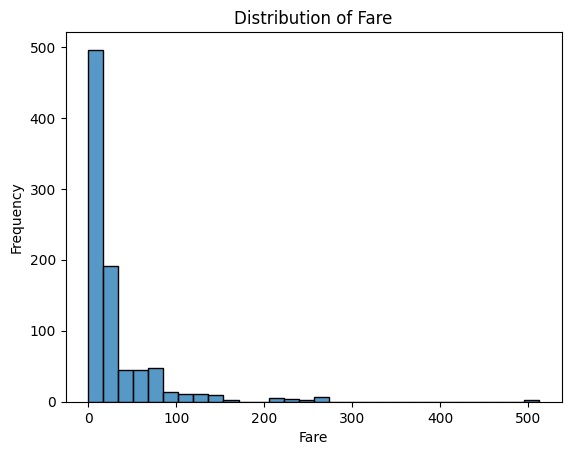

In [10]:
#  빠르게 예쁘고 직관적인 그래프를 그릴 때는 Seaborn을 먼저 쓰고,
# 세부 디자인을 조정하거나 특수한 그래프가 필요할 때는 Matplotlib을 직접 다룬다는 식으로 병행해서 사용합니다.

# sns.<그래프함수>(data=데이터프레임, x="열이름", y='열이름', 옵션들)
sns.histplot(data=df_train, x="Fare", bins=30)

plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.show()

In [11]:
del df_train['Fare']

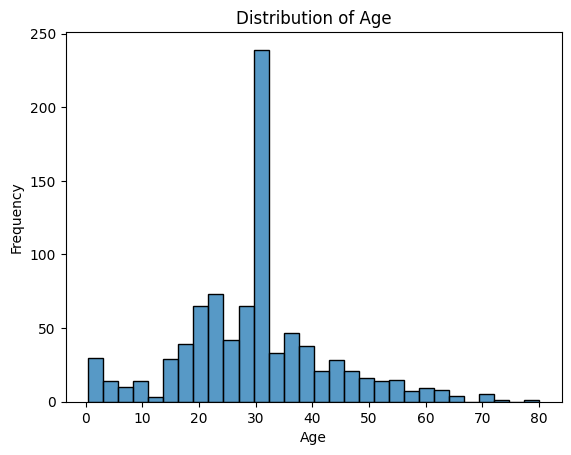

In [12]:
sns.histplot(data=df_train, x="Age", bins=30)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [13]:
def get_category(age) :
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Child'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'

    return cat

df_train['Age_cat'] = df_train['Age'].apply(lambda x : get_category(x))

del df_train['Age']

In [ ]:
df_train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,social_status,Age_cat
0,1,0,3,0,1,0,N,S,Mr,Student
1,2,1,1,1,1,0,C,C,Mrs,Adult
2,3,1,3,1,0,0,N,S,Miss,Young Child
3,4,1,1,1,1,0,C,S,Mrs,Young Child
4,5,0,3,0,0,0,N,S,Mr,Young Child
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,N,S,Rev,Young Child
887,888,1,1,1,0,0,B,S,Miss,Student
888,889,0,3,1,1,2,N,S,Miss,Young Child
889,890,1,1,0,0,0,C,C,Mr,Young Child


Process until this stage : del unnecessary column, categorize column
current state : revision of Data Type
through label Encoding ( object - int )

In [14]:
from sklearn import preprocessing

# 전처리 변환기 사용할 때 fit 과 transform 메소드를 적용해야 됨
list_col = ['Cabin', 'Embarked','social_status', 'Age_cat']
for col in list_col:
  le = preprocessing.LabelEncoder()  # le 라는 전처리 중 라벨인코더 객체 생성
  le.fit(df_train[col]) # 객체에 df_train fit
  df_train[col] = le.transform(df_train[col]) # 객체에 df_train transform 하고 df 에 추가하기
  label_mapping = dict(zip(le.classes_, le.transform(le.classes_))) # classes 는 레이블 인코더의 속성으로 모든 고유 클래스를 (사전순서)정렬함
  # le.classes_ = ['Age_cat' .. . 'social_status'] le.transform(le.classes_) =[0,1,2,3]
  print(f"Label Mapping for {col} : {label_mapping}")

Label Mapping for Cabin : {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'N': 7, 'T': 8}
Label Mapping for Embarked : {'C': 0, 'N': 1, 'Q': 2, 'S': 3}
Label Mapping for social_status : {'0': 0, 'Col': 1, 'Dr': 2, 'Master': 3, 'Miss': 4, 'Mr': 5, 'Mrs': 6, 'Rev': 7}
Label Mapping for Age_cat : {'Adult': 0, 'Baby': 1, 'Child': 2, 'Elderly': 3, 'Student': 4, 'Teenager': 5, 'Young Child': 6}


In [15]:
del df_train['PassengerId']
df_train

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,social_status,Age_cat
0,0,3,0,1,0,7,3,5,4
1,1,1,1,1,0,2,0,6,0
2,1,3,1,0,0,7,3,4,6
3,1,1,1,1,0,2,3,6,6
4,0,3,0,0,0,7,3,5,6
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,7,3,7,6
887,1,1,1,0,0,1,3,4,4
888,0,3,1,1,2,7,3,4,6
889,1,1,0,0,0,2,0,5,6


<Axes: xlabel='Sex', ylabel='Survived'>

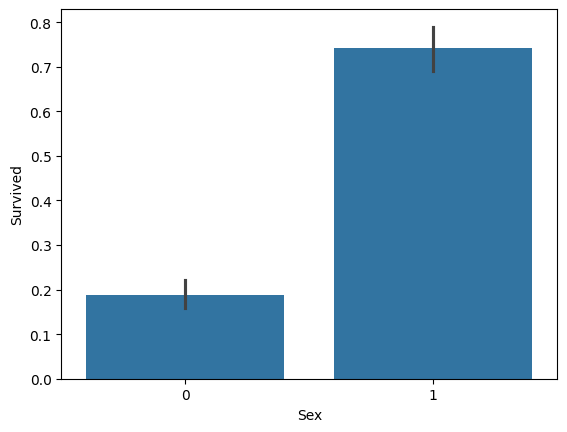

In [16]:
sns.barplot(data=df_train, x="Sex", y='Survived')

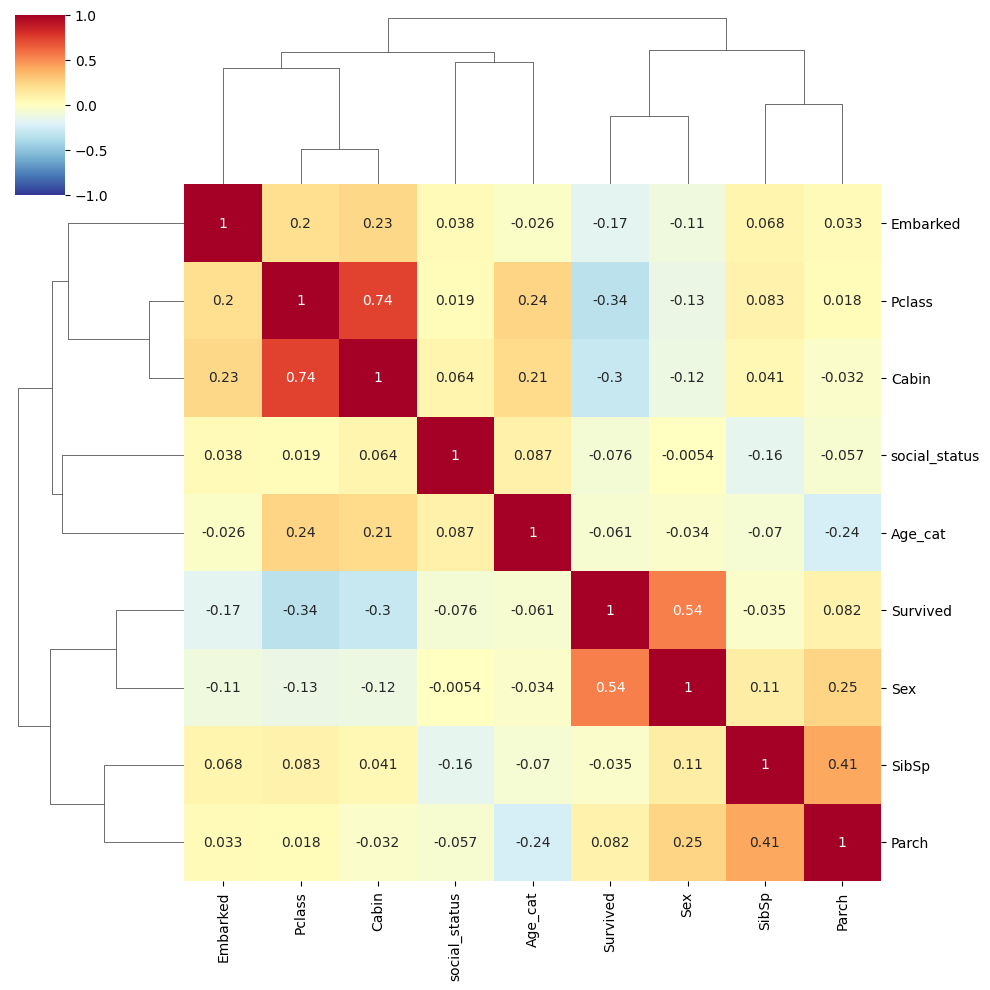

In [17]:
sns.clustermap(df_train.corr(), # df,corr
               annot = True, # 데이터 값을 표시하겠다는 이야기
               cmap = "RdYlBu_r",
               vmin = -1, vmax = 1
)
# 빨갈수록 상관관계가 높음

In [27]:
from sklearn.model_selection import train_test_split

y_titan_data = df_train['Survived']
# 왜 inplace = False 하는지 아직 모름
X_titan_data = df_train.drop("Survived", axis = 1, inplace = False)
# 순서와 비율지정에 대한 이야기
X_train, X_test, y_train, y_test = train_test_split(X_titan_data, y_titan_data, test_size=0.3, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
# 모델 객체 생성
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
lr_clf = LogisticRegression(random_state=42)


In [31]:
# format 함수 좀 더 공부하기
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 :{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 :{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 :{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 :0.7761
RandomForestClassifier 정확도 :0.7910
LogisticRegression 정확도 :0.7910


In [33]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  kfold = KFold(n_splits = folds)
  scores = []

  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titan_data)):
    X_train, X_test = X_titan_data.values[train_index], X_titan_data.values[test_index]
    y_train, y_test = y_titan_data.values[train_index], y_titan_data.values[test_index]

    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))

  mean_score = np.mean(scores)
  print("평균 정확도 : {0:.4f}".format(mean_score))

exec_kfold(rf_clf, folds=5)

교차 검증 0 정확도 : 0.7598
교차 검증 1 정확도 : 0.7921
교차 검증 2 정확도 : 0.8202
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8371
평균 정확도 : 0.7958


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_clf, X_titan_data, y_titan_data,cv=5)
print("scores : ", scores)
for iter_count, accuracy in enumerate(scores):
  print("교차검증{0} 정확도: {1:.4f}".format(iter_count+1,accuracy))

print("평균정확도: {0:.4f}".format(np.mean(scores)))

scores :  [0.79329609 0.80337079 0.8258427  0.78089888 0.83146067]
교차검증1 정확도: 0.7933
교차검증2 정확도: 0.8034
교차검증3 정확도: 0.8258
교차검증4 정확도: 0.7809
교차검증5 정확도: 0.8315
평균정확도: 0.8070
